In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('RetailDS.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,5/16/2023,CUST996,Male,62,Clothing,1,50,50
996,997,11/17/2023,CUST997,Male,52,Beauty,3,30,90
997,998,10/29/2023,CUST998,Female,23,Beauty,4,25,100
998,999,12/5/2023,CUST999,Female,36,Electronics,3,50,150


In [5]:
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  11/24/2023     CUST001    Male   34           Beauty   
1               2   2/27/2023     CUST002  Female   26         Clothing   
2               3   1/13/2023     CUST003    Male   50      Electronics   
3               4   5/21/2023     CUST004    Male   37         Clothing   
4               5    5/6/2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [6]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [11]:
df = df.dropna()

In [13]:
print(df.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.set_index

<bound method DataFrame.set_index of             Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-11-24               1     CUST001    Male   34           Beauty   
2023-02-27               2     CUST002  Female   26         Clothing   
2023-01-13               3     CUST003    Male   50      Electronics   
2023-05-21               4     CUST004    Male   37         Clothing   
2023-05-06               5     CUST005    Male   30           Beauty   
...                    ...         ...     ...  ...              ...   
2023-05-16             996     CUST996    Male   62         Clothing   
2023-11-17             997     CUST997    Male   52           Beauty   
2023-10-29             998     CUST998  Female   23           Beauty   
2023-12-05             999     CUST999  Female   36      Electronics   
2023-04-12            1000    CUST1000    Male   47      Electronics   

            Quantity  Pric

In [17]:
monthly_sales = df['Total Amount'].resample('MS').sum()
print(monthly_sales)

Date
2023-01-01    35450
2023-02-01    44060
2023-03-01    28990
2023-04-01    33870
2023-05-01    53150
2023-06-01    36715
2023-07-01    35465
2023-08-01    36960
2023-09-01    23620
2023-10-01    46580
2023-11-01    34920
2023-12-01    44690
2024-01-01     1530
Freq: MS, Name: Total Amount, dtype: int64


In [29]:
gndr = df["Gender"].value_counts()
gndr

Gender
Female    510
Male      490
Name: count, dtype: int64

green: grey
skyblue: Male


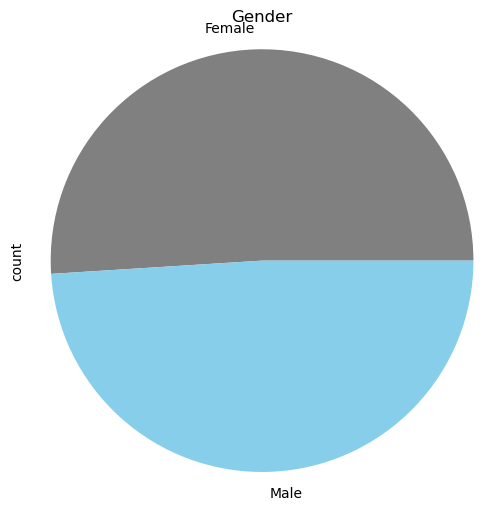

In [37]:
gndr.plot(figsize=(6,6), kind='pie', colors=["grey","skyblue"])
plt.title("Gender")
plt.axis("equal")
print("green: grey")
print("skyblue: Male")
plt.show()

In [39]:
count = df["Product Category"].value_counts()
count

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

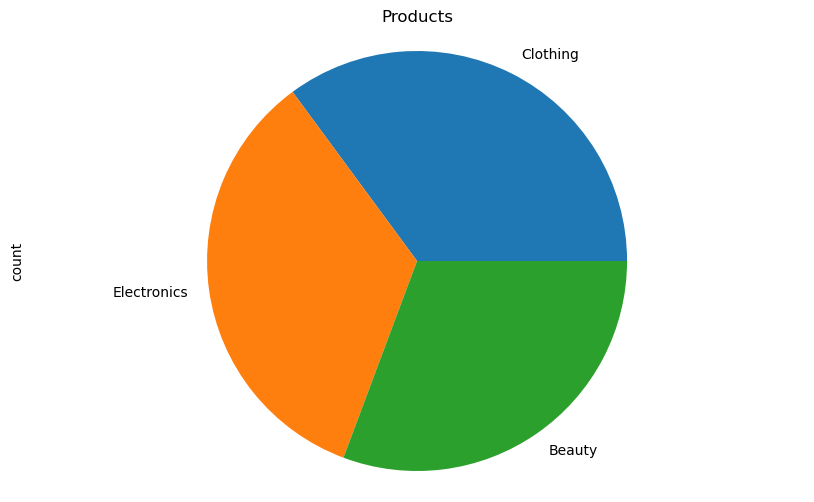

In [43]:
explode = [0.1, 0, 0.2] 
count.plot(kind = "pie" , figsize = (10,6))
color_list = ["Applegreen","skyyellow","babypink"]
plt.title('Products')
plt.axis("equal")
plt.show()


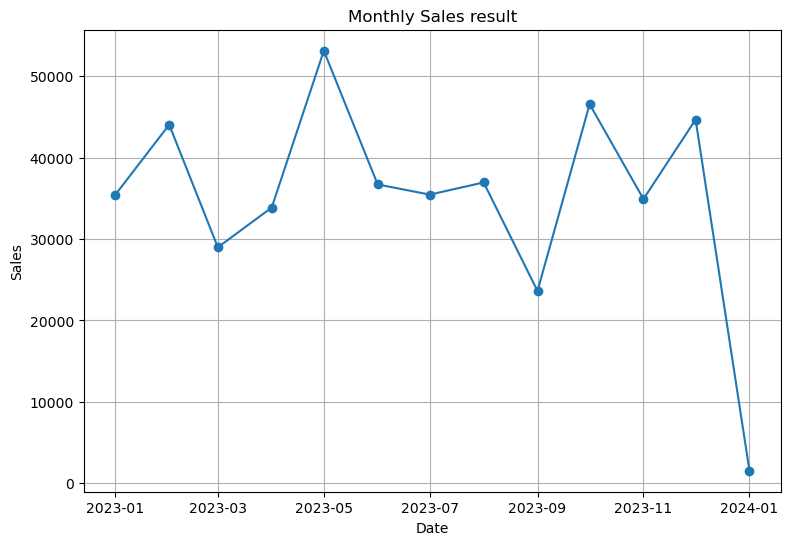

In [33]:
plt.figure(figsize=(9, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales result')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [34]:
customer_sales = df.groupby('Customer ID')['Total Amount'].sum().reset_index()

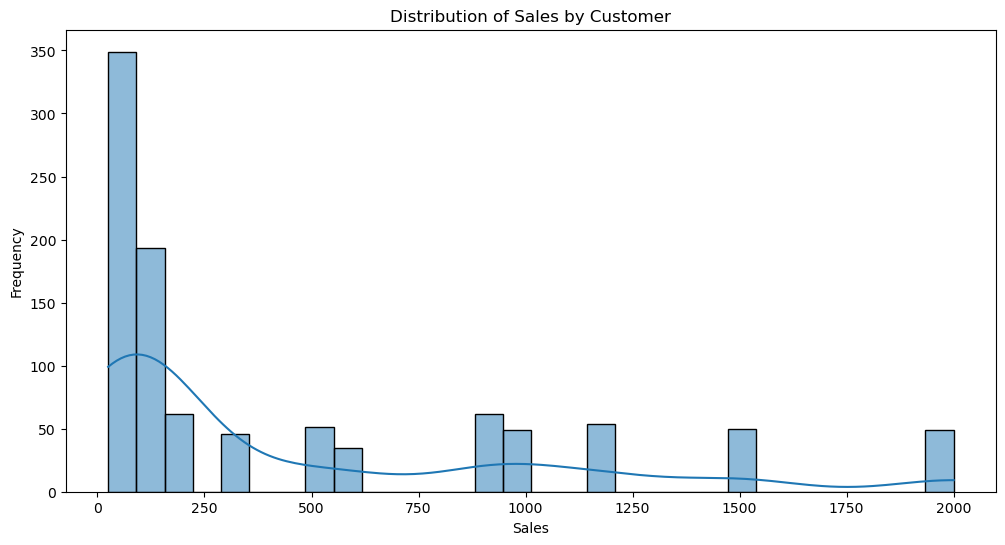

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(customer_sales['Total Amount'], bins=30, kde=True)
plt.title('Distribution of Sales by Customer')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [63]:
product_sales = df.groupby('Product Category')[["Quantity","Total Amount"]].sum()
product_sales


,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


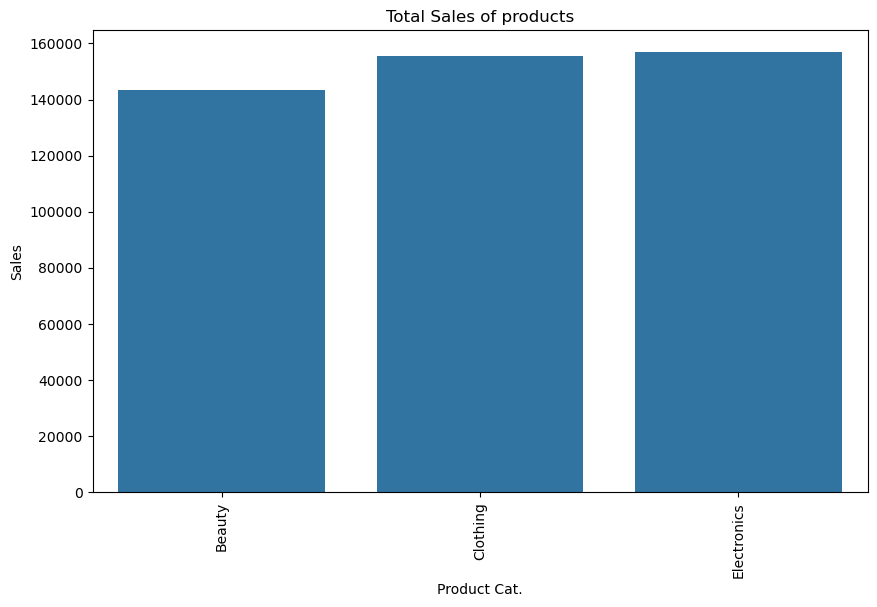

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product Category', y='Total Amount', data=product_sales)
plt.title('Total Sales of products')
plt.xlabel('Product Cat.')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [67]:
sales_pivot = df.pivot_table(values='Total Amount', index=df.index.month, columns='Product Category', aggfunc='sum', fill_value=0)

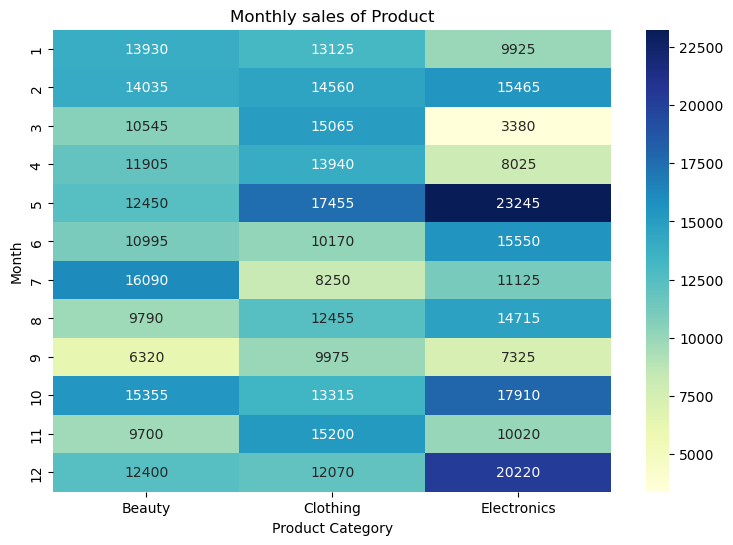

In [69]:
plt.figure(figsize=(9, 6))
sns.heatmap(sales_pivot, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Monthly sales of Product')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

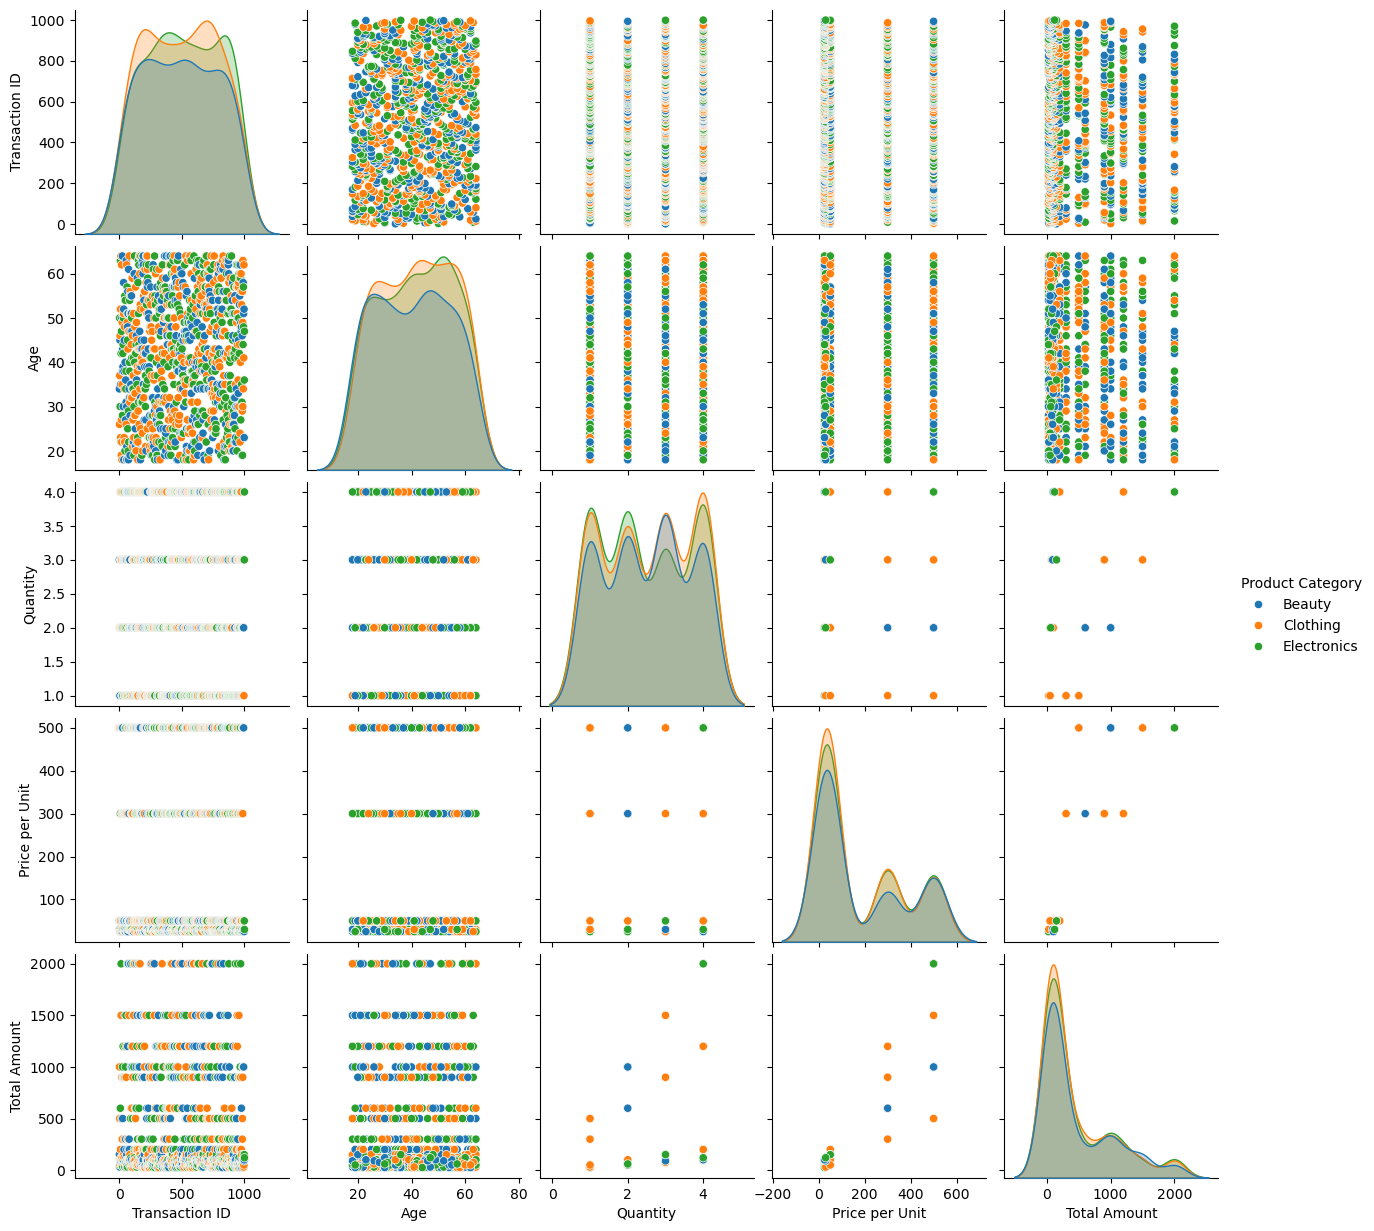

In [59]:
sns.pairplot(df, hue="Product Category")

In [71]:
top_products = product_sales.sort_values(by='Total Amount', ascending=True)
print("Top Products by Sales:")
print(top_products)

Top Products by Sales:
                  Quantity  Total Amount
Product Category                        
Beauty                 771        143515
Clothing               894        155580
Electronics            849        156905


In [49]:
highest_sales_month = monthly_sales.idxmax()
highest_sales_value = monthly_sales.max()
print(f"Month with highest sales: {highest_sales_month.strftime('%Y-%m')}, Sales: {highest_sales_value}")

Month with highest sales: 2023-05, Sales: 53150
